In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler

In [2]:
df = pd.read_csv('/content/placement.csv')
df.head()

,cgpa,iq,placed
0,6.35,83,0
1,6.16,91,0
2,6.39,92,0
3,6.66,88,0
4,6.13,93,0


In [3]:
X = df.drop('placed',axis=1).values
y = df['placed'].values

std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=101)

<Axes: xlabel='cgpa', ylabel='iq'>

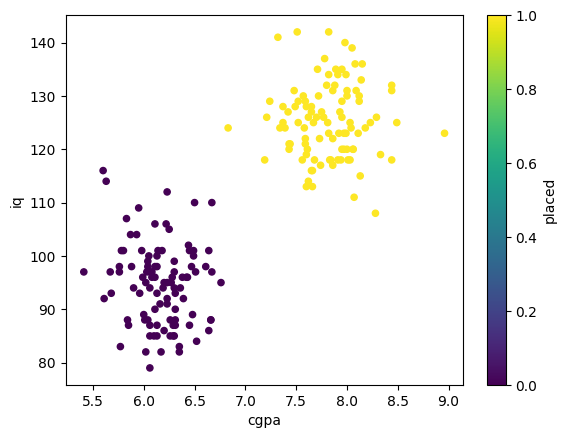

In [4]:
df.plot(
    kind='scatter',
    x='cgpa',
    y='iq',
    c='placed',
    colormap='viridis')

In [5]:
class Perceptron:
    def __init__(self , epochs , learning_rate):
      self.epochs = epochs
      self.learning_rate = learning_rate
      self.weights = None
      self.bias = None

    def fit(self , X , y):
      self.weights = np.ones(X.shape[1])
      self.bias = 0;

      for i in range(self.epochs):
        for j in range(X.shape[0]):

          z = np.dot(self.weights , X[j]) + self.bias

          if y[j] * z < 1:
            self.weights = self.weights + (self.learning_rate * y[j] * X[j])
            self.bias = self.bias + (self.learning_rate * y[j])

      return self.bias , self.weights

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.where(z >= 0, 1, -1)

    def draw_decision_boundary(self, X, y):
        if self.weights[1] == 0:
            plt.axvline(-self.bias / self.weights[0])
        else:
            m = -self.weights[0] / self.weights[1]
            c = -self.bias / self.weights[1]
            x = np.linspace(X.min() - 1, X.max() + 1, 100)
            y_line = m * x + c
            plt.plot(x, y_line, color='black')

        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

Accuracy: 0.5


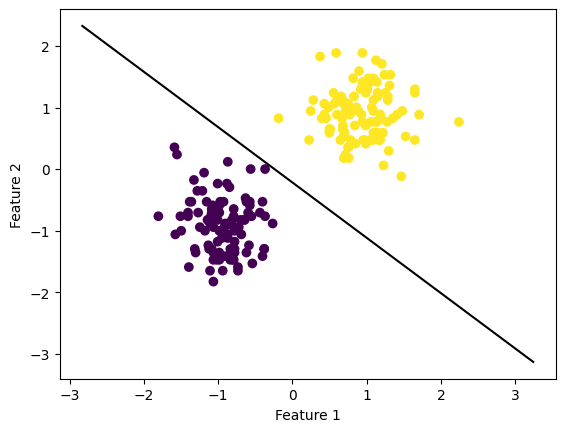

In [6]:
perceptron = Perceptron(epochs=100, learning_rate=0.01)
perceptron.fit(X, y)

# Predict
predictions = perceptron.predict(X)
print("Accuracy:", np.mean(predictions == y))

# Visualize
perceptron.draw_decision_boundary(X, y)